In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
df_0_5 = pd.read_csv("The Wild Bunch (1969)_llava-hf_llava-interleave-qwen-0.5b-hfkey_shot_annotated.csv")

In [3]:
df_7 = pd.read_csv("The Wild Bunch (1969)_llava-hf_llava-interleave-qwen-7b-hfkey_shot_annotated.csv")

In [4]:
df_ground = pd.read_csv("The Wild Bunch (1969)-2-0_75.csv")

In [5]:
df_sft = pd.read_csv("The Wild Bunch (1969)_asgaard-model-finetuning-results-abhishek_checkpoint-240key_shot_annotated.csv")

In [6]:
df_sft["Description sft"] = df_sft["Description"].replace(to_replace=" No Action Found",value="None")

In [7]:
df_sft["Description"].unique()

array([' No Action Found', ' Fight', ' Speed'], dtype=object)

In [8]:
df_sft

,Key Shot,Description,Description sft
0,0,No Action Found,None
1,842,No Action Found,None
2,888,No Action Found,None
3,1270,No Action Found,None
4,1804,No Action Found,None
...,...,...,...
2426,511880,No Action Found,None
2427,512097,No Action Found,None
2428,512272,No Action Found,None
2429,512392,No Action Found,None


In [9]:
df_7

,Key Shot,Description
0,0,6
1,842,None of the Above
2,888,6
3,1270,7
4,1804,6
...,...,...
2426,511880,6
2427,512097,6
2428,512272,6
2429,512392,6


In [10]:
df_ground

,Start,End,Start Time,End Time,Action
0,0,60,00:00:00.000,00:00:01.001,NaN
1,61,877,00:00:01.018,00:00:14.631,NaN
2,878,952,00:00:14.648,00:00:15.883,NaN
3,953,1597,00:00:15.899,00:00:26.643,NaN
4,1598,2152,00:00:26.660,00:00:35.903,NaN
...,...,...,...,...,...
2425,511790,512034,02:22:18.372,02:22:22.442,NaN
2426,512035,512144,02:22:22.459,02:22:24.278,NaN
2427,512145,512354,02:22:24.294,02:22:27.781,NaN
2428,512355,512451,02:22:27.798,02:22:29.399,NaN


In [11]:
df_ground["Action"] = df_ground["Action"].replace(to_replace=np.nan, value="None")


In [12]:
df_ground

,Start,End,Start Time,End Time,Action
0,0,60,00:00:00.000,00:00:01.001,None
1,61,877,00:00:01.018,00:00:14.631,None
2,878,952,00:00:14.648,00:00:15.883,None
3,953,1597,00:00:15.899,00:00:26.643,None
4,1598,2152,00:00:26.660,00:00:35.903,None
...,...,...,...,...,...
2425,511790,512034,02:22:18.372,02:22:22.442,None
2426,512035,512144,02:22:22.459,02:22:24.278,None
2427,512145,512354,02:22:24.294,02:22:27.781,None
2428,512355,512451,02:22:27.798,02:22:29.399,None


In [13]:
df_0_5["Description 0.5"] = df_0_5["Description"]

In [14]:
df_0_5

,Key Shot,Description,Description 0.5
0,0,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
1,842,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
2,888,,
3,1270,The video is a sequence of images with a blac...,The video is a sequence of images with a blac...
4,1804,The video shows a group of men riding horses ...,The video shows a group of men riding horses ...
...,...,...,...
2426,511880,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
2427,512097,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
2428,512272,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
2429,512392,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...


In [15]:
df_7["Description 7"] = df_7["Description"]

In [16]:
merged_df = pd.concat([df_7,df_0_5,df_sft,df_ground],axis=1)

In [17]:
merged_df

,Key Shot,Description,Description 7,Key Shot,Description,Description 0.5,Key Shot,Description,Description sft,Start,End,Start Time,End Time,Action
0,0,6,6,0,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,0,No Action Found,None,0.0,60.0,00:00:00.000,00:00:01.001,None
1,842,None of the Above,None of the Above,842,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,842,No Action Found,None,61.0,877.0,00:00:01.018,00:00:14.631,None
2,888,6,6,888,,,888,No Action Found,None,878.0,952.0,00:00:14.648,00:00:15.883,None
3,1270,7,7,1270,The video is a sequence of images with a blac...,The video is a sequence of images with a blac...,1270,No Action Found,None,953.0,1597.0,00:00:15.899,00:00:26.643,None
4,1804,6,6,1804,The video shows a group of men riding horses ...,The video shows a group of men riding horses ...,1804,No Action Found,None,1598.0,2152.0,00:00:26.660,00:00:35.903,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,511880,6,6,511880,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,511880,No Action Found,None,512035.0,512144.0,02:22:22.459,02:22:24.278,None
2427,512097,6,6,512097,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,512097,No Action Found,None,512145.0,512354.0,02:22:24.294,02:22:27.781,None
2428,512272,6,6,512272,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,512272,No Action Found,None,512355.0,512451.0,02:22:27.798,02:22:29.399,None
2429,512392,6,6,512392,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,512392,No Action Found,None,512452.0,512606.0,02:22:29.416,02:22:31.985,None


In [18]:
merged_df = merged_df[["Description 7","Description 0.5", "Description sft","Action"]]

In [19]:
merged_df

,Description 7,Description 0.5,Description sft,Action
0,6,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,None,None
1,None of the Above,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,None,None
2,6,,None,None
3,7,The video is a sequence of images with a blac...,None,None
4,6,The video shows a group of men riding horses ...,None,None
...,...,...,...,...
2426,6,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,None,None
2427,6,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,None,None
2428,6,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,None,None
2429,6,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,None,None


In [20]:
from transformers import AutoTokenizer, SiglipTextModel

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
mapping_dict = {
    "6":"Pursuit",
    "None of the Above": "None",
    "7":"None",
    "4":"Heist",
    "4. Heist": "Heist",
    "5": "Fight",
    "1": "Rescue",
    "2": "Escape",
    "3": "Capture",
    "1. Rescue": "Rescue",
    "2. Escape": "Escape",
    "7. None of the Above - For scenes that do not fall into any of the aforementioned categories.":"None",
    "The video does not provide enough information to classify the actions." : "None",
    "650":"None",
    "The video does not provide any clear actions to classify." : "None",
    "6. None of the Above - For scenes that do not fall into any of the aforementioned categories." : "None",
    "The video does not provide enough context to determine the exact actions taking place.": "None",
    "1. Rescue\n2. Escape" : "Rescue and Escape",
}
for entry in merged_df["Description 7"].unique():
    print(mapping_dict[str(entry)])

merged_df["Description 7"] = merged_df["Description 7"].apply(lambda x : mapping_dict[str(x)])

Pursuit
None
None
Heist
Heist
Fight
Rescue
Escape
Capture
Rescue and Escape
None
None
None
None
None
None


/tmp/ipykernel_2234/1440177365.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Description 7"] = merged_df["Description 7"].apply(lambda x : mapping_dict[str(x)])


In [22]:
merged_df

,Description 7,Description 0.5,Description sft,Action
0,Pursuit,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,None,None
1,None,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,None,None
2,Pursuit,,None,None
3,None,The video is a sequence of images with a blac...,None,None
4,Pursuit,The video shows a group of men riding horses ...,None,None
...,...,...,...,...
2426,Pursuit,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,None,None
2427,Pursuit,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,None,None
2428,Pursuit,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,None,None
2429,Pursuit,!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,None,None


In [23]:
from transformers import AutoTokenizer, SiglipTextModel

model = SiglipTextModel.from_pretrained("google/siglip-base-patch16-224").to("cuda")
tokenizer = AutoTokenizer.from_pretrained("google/siglip-base-patch16-224")
list_0_5 = []
list_7 = []
list_sft = []
for index, row in merged_df.iterrows():
    desc_inputs_7 = [str(row.get("Description 7", ""))]
    desc_inputs_0_5 = [str(row.get("Description 0.5", ""))]
    desc_inputs_action = [str(row.get("Action", ""))]
    desc_sft = [str(row.get("Description sft",""))]
    inputs_7 = tokenizer(
        desc_inputs_7, 
        padding=True,  # Ensures batch processing
        truncation=True,  # Ensures inputs fit model's expected length
        return_tensors="pt"
    ).to("cuda")
    inputs_0_5 = tokenizer(
        desc_inputs_0_5, 
        padding=True,  # Ensures batch processing
        truncation=True,  # Ensures inputs fit model's expected length
        return_tensors="pt"
    ).to("cuda")
    inputs_action = tokenizer(
        desc_inputs_action, 
        padding=True,  # Ensures batch processing
        truncation=True,  # Ensures inputs fit model's expected length
        return_tensors="pt"
    ).to("cuda")
    inputs_sft = tokenizer(
        desc_sft, 
        padding=True,  # Ensures batch processing
        truncation=True,  # Ensures inputs fit model's expected length
        return_tensors="pt"
    ).to("cuda")
    outputs_7 = model(**inputs_7)
    feature_7 = outputs_7.pooler_output[0].detach().flatten().reshape(1,-1)
    outputs_0_5 = model(**inputs_0_5)
    feature_0_5 = outputs_0_5.pooler_output[0].detach().flatten().reshape(1,-1)
    outputs_action = model(**inputs_action)
    feature_action = outputs_action.pooler_output[0].detach().flatten().reshape(1,-1)
    outputs_sft = model(**inputs_sft)
    feature_sft = outputs_sft.pooler_output[0].detach().flatten().reshape(1,-1)
    similarity_0_5 = torch.nn.functional.cosine_similarity(feature_0_5,feature_action).item()
    similarity_7 = torch.nn.functional.cosine_similarity(feature_7,feature_action).item()
    similarity_sft = torch.nn.functional.cosine_similarity(feature_sft,feature_action).item()
    loss_0_5 = 1 - similarity_0_5
    loss_7 = 1 - similarity_7
    loss_sft = 1 - similarity_sft
    list_0_5.append(loss_0_5)
    list_7.append(loss_7)
    list_sft.append(loss_sft)


In [24]:
loss_df = pd.DataFrame({"list_0_5":list_0_5,"list_7":list_7, "list_sft":list_sft})
window = 30

In [25]:
loss_df["llava 0.5B parameter model"] = loss_df["list_0_5"].rolling(window=window, center=True).mean()

In [26]:
loss_df["llava 7B parameter model"] = loss_df["list_7"].rolling(window=window, center=True).mean()

In [27]:
loss_df["sft trained llava 0.5B parameter"] = loss_df["list_sft"].rolling(window=window, center=True).mean()

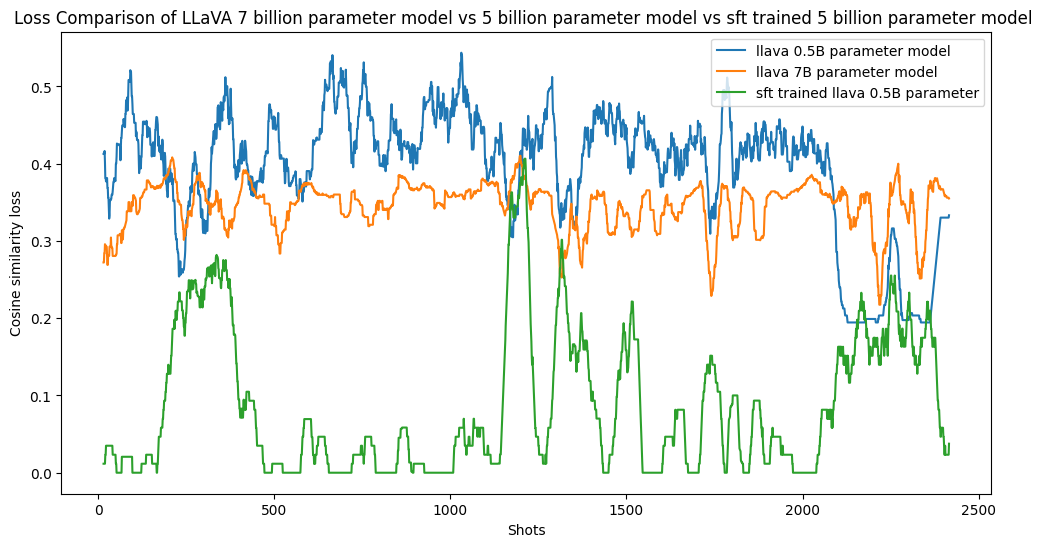

In [28]:
loss_df[["llava 0.5B parameter model","llava 7B parameter model","sft trained llava 0.5B parameter"]].plot()
plt.gcf().set_size_inches(12, 6)
plt.xlabel("Shots")
plt.ylabel("Cosine similarity loss")
plt.title("Loss Comparison of LLaVA 7 billion parameter model vs 5 billion parameter model vs sft trained 5 billion parameter model ")
plt.savefig("loss_analysis.png")

In [30]:
loss_df.describe().to_csv("llm_summary.csv")

In [35]:
summary_df = loss_df.describe()[["llava 0.5B parameter model","llava 7B parameter model","sft trained llava 0.5B parameter"]].transpose()[["mean","std"]]

In [36]:
summary_df

,mean,std
llava 0.5B parameter model,0.395159,0.080633
llava 7B parameter model,0.345905,0.030301
sft trained llava 0.5B parameter,0.085904,0.090745


In [37]:
summary_df["Mean Cosine Loss"] = summary_df["mean"] 

In [40]:
summary_df["Standard Deviation Cosine Loss"] = summary_df["std"]

In [43]:
summary_df[["Mean Cosine Loss","Standard Deviation Cosine Loss"]].to_csv("llm_summary.csv")